In [92]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [93]:
plt.style.use('fivethirtyeight')
cols=["forex_rate","cpi","ppi","bank_rate","current_account","inflation_rate","gdp","per1","per2","per3"]
data=pd.read_table('Workbook3.csv',sep=',',names=cols,parse_dates=[0], index_col=0,header=0)
data.forex_rate=data.forex_rate.astype(float)
data.head()


,forex_rate,cpi,ppi,bank_rate,current_account,inflation_rate,gdp,per1,per2,per3
1973-01-04,8.00,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.02,8.02,8.02
1973-01-05,8.01,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.00,8.02,8.02
1973-01-06,8.01,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.01,8.00,8.02
1973-01-07,8.01,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.01,8.01,8.00
1973-01-08,8.00,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.01,8.01,8.01


In [94]:
cols2=["cpi","ppi","bank_rate","current_account","inflation_rate","gdp","per1","per2","per3"]
y=data["forex_rate"]
x=data[cols2]

In [95]:
##Here we have three regression models - SVM, Ridge, Lasso

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,test_size=0.25,random_state=0)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


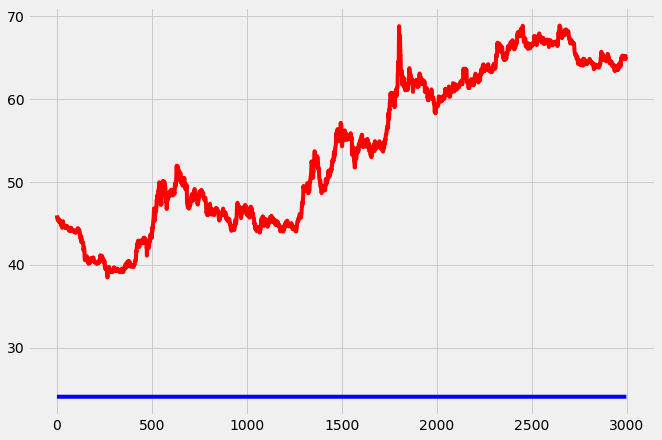

In [113]:
svr=SVR(epsilon=2)
svr.fit(x_train, y_train)
y_pred=svr.predict(x_test)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(y_pred, color='blue',label='prediction')
plt.plot(np.array(y_test), color='red', label='original')
plt.show()

In [114]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-10.319021463553424

In [115]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

985.7283979246337

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.424511e-25
  overwrite_a=True).T


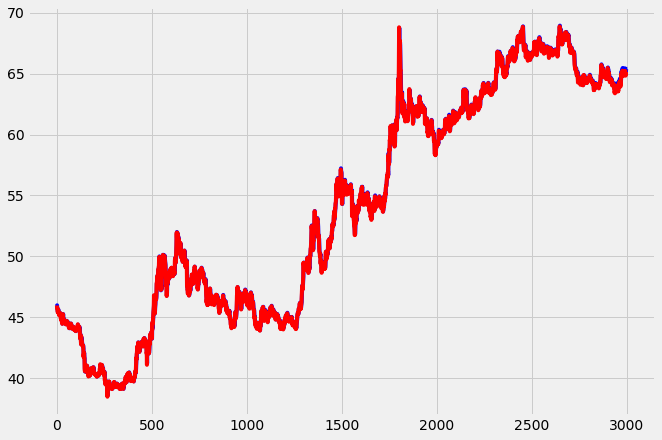

In [116]:
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(y_pred, color='blue',label='prediction')
plt.plot(np.array(y_test), color='red', label='original')
plt.show()

In [117]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.08210655515660285

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


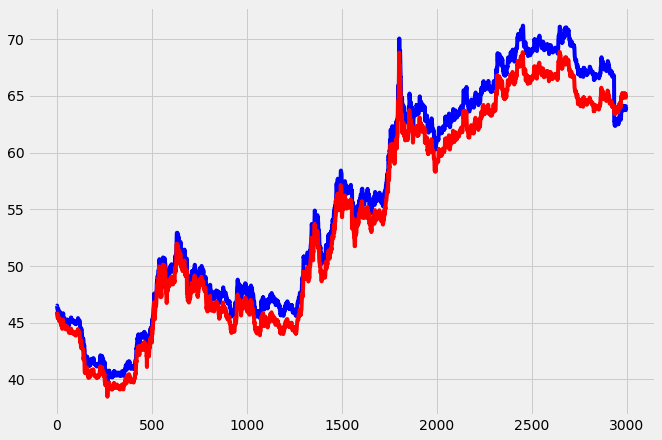

In [118]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(y_pred, color='blue',label='prediction')
plt.plot(np.array(y_test), color='red', label='original')
plt.show()

In [119]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9666123141311654

In [120]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2.9076002910560153

In [121]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

In [106]:
#Correlation Matrix
#features show multicollinearity 

import matplotlib.pyplot as plt

In [107]:
def plot_correlation_matrix(df):
    figure, axis = plt.subplots(nrows=1, ncols=1)
    caxis = axis.matshow(df.corr())
    ticks = list(range(len(df.columns)))
    axis.set_xticks(ticks)
    axis.set_yticks(ticks)

    axis.set_xticklabels(df.columns, rotation=90, horizontalalignment='right')
    axis.set_yticklabels(df.columns)
    plt.show()

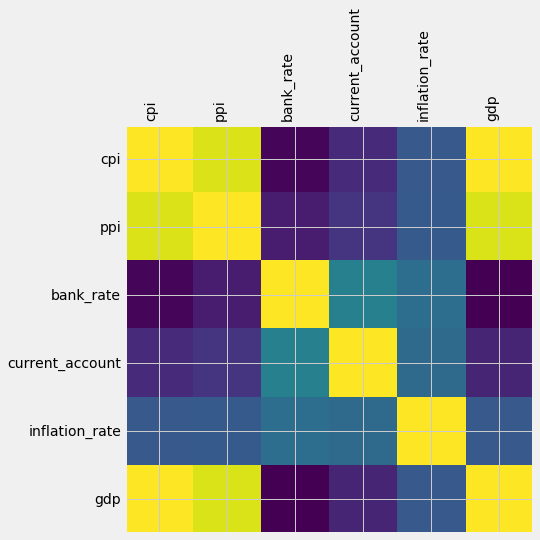

In [108]:
y_train,y_test=np.split(data["forex_rate"], indices_or_sections=[8812], axis=0)

X=data[["cpi","ppi","bank_rate","current_account","inflation_rate","gdp","per1","per2","per3"]]
x_train = X[0:8812]
x_test = X[8812:11812]
plot_correlation_matrix(data[["cpi","ppi","bank_rate","current_account","inflation_rate","gdp"]])